In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [91]:
timestamp = "2022_1025_1721_42"

In [1]:
timestamp = "2022_1101_1209_09"

In [3]:
train_state_dict = torch.load(f"debug/{timestamp}.train.debug")

In [4]:
preactivation_dict = train_state_dict['preactivation']

In [5]:
preamap = preactivation_dict['final_conv']['module.method.final_conv']
preamap
print(preamap[0].data.shape)
data = preamap[0].cpu().detach().numpy()
## data = amap.sigmoid().cpu().detach().numpy()
## data[data < 1-1e-2] = 0

torch.Size([5, 8, 176, 192])


torch.Size([5, 8, 176, 192])


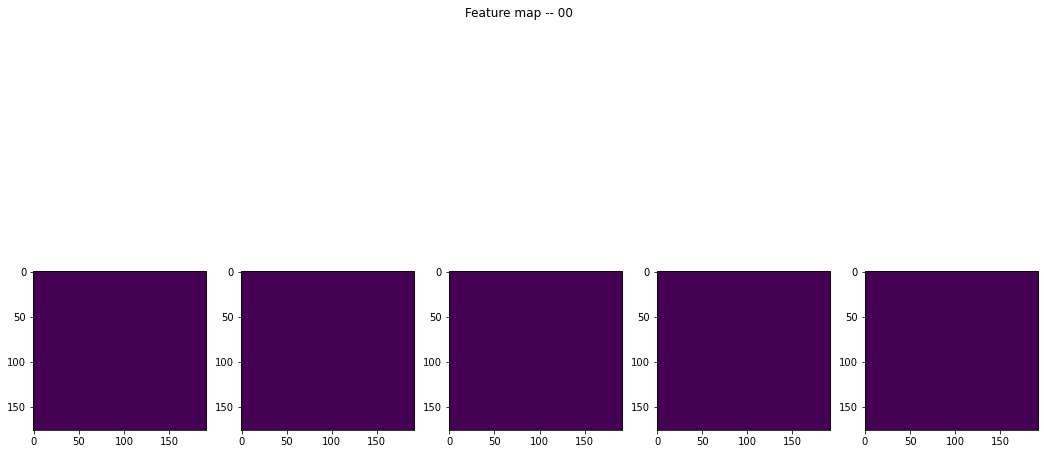

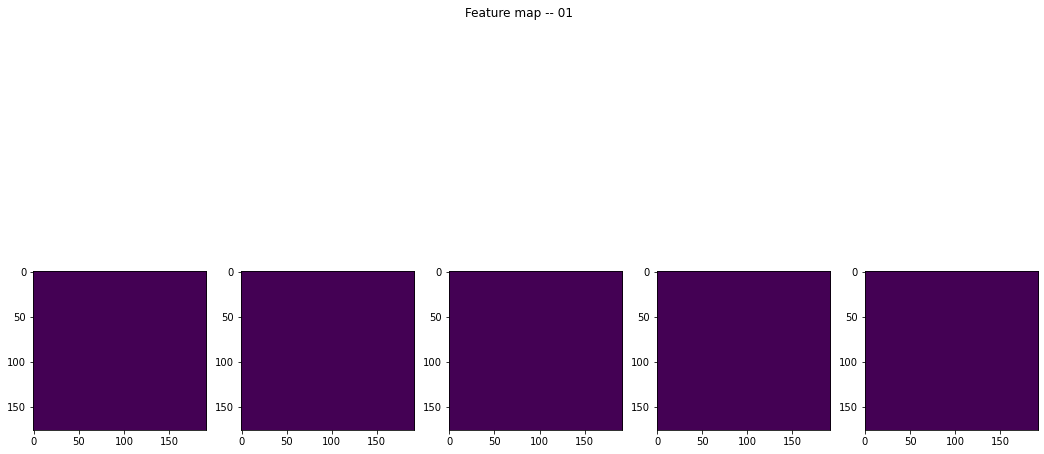

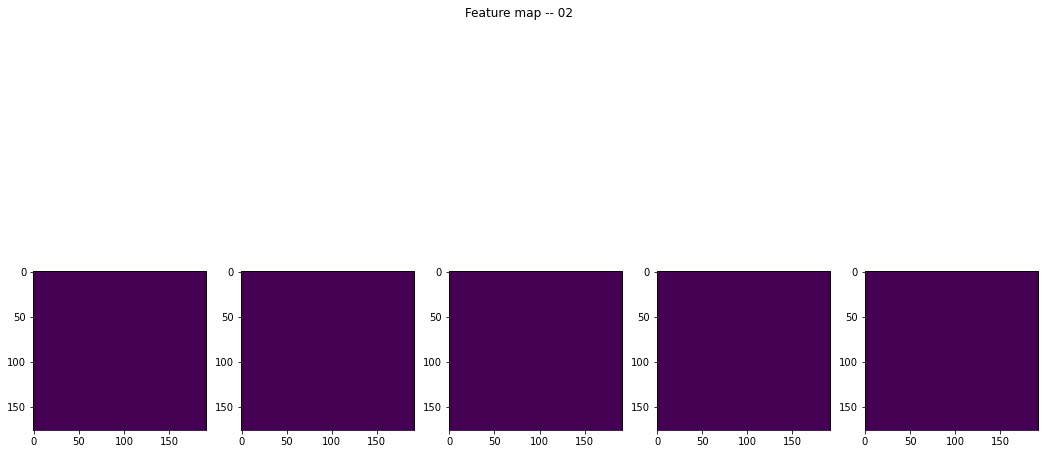

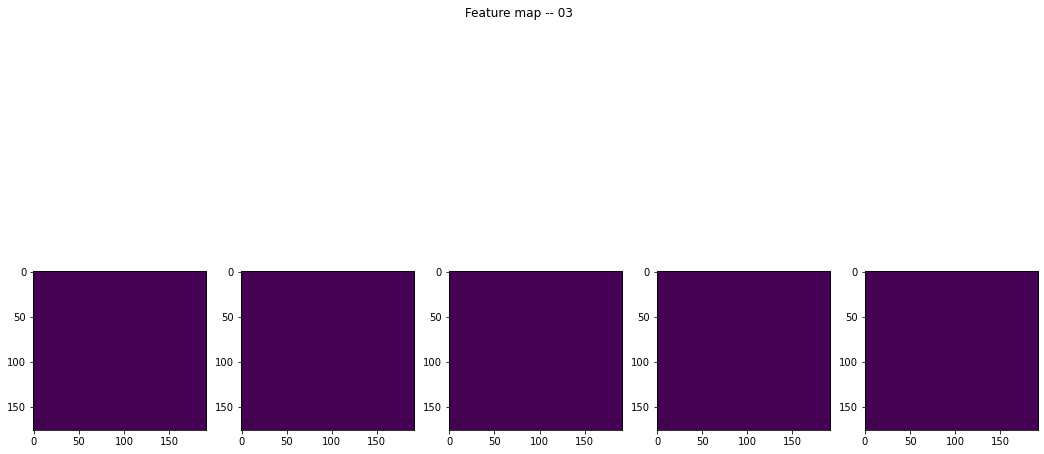

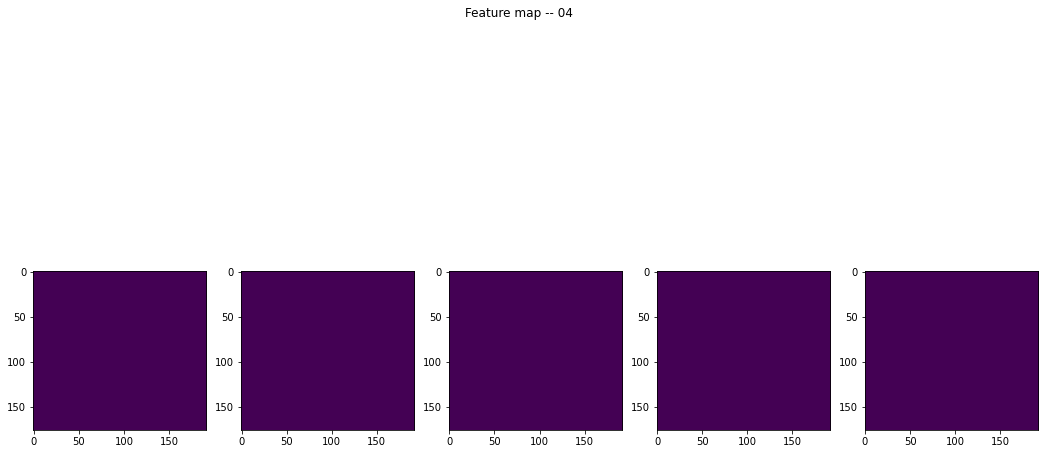

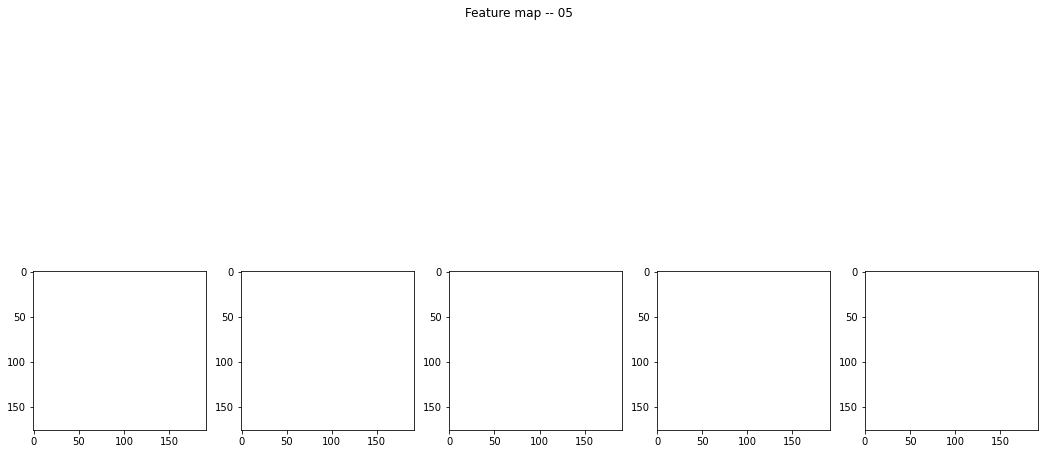

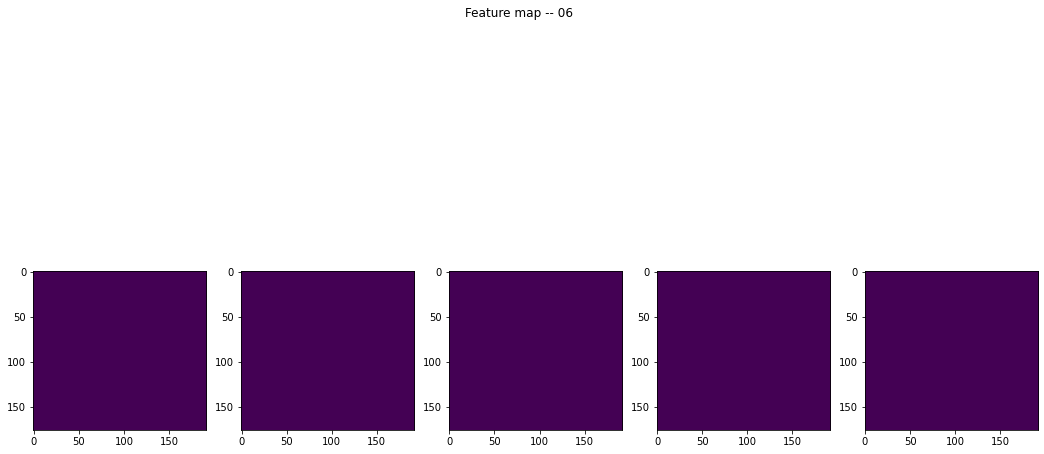

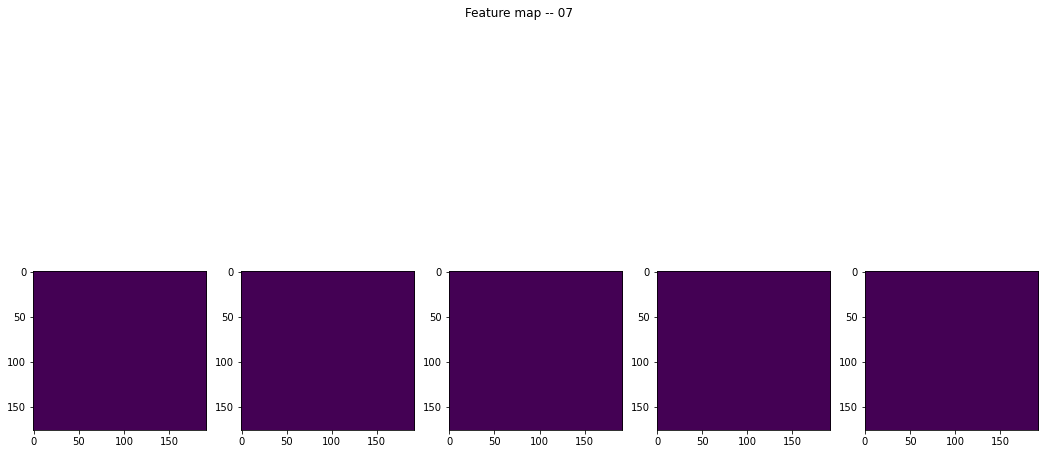

In [7]:
preamap = preactivation_dict['final_conv']['module.method.final_conv']
preamap
print(preamap[0].data.shape)
data = preamap[0].cpu().detach().numpy()
## data = amap.sigmoid().cpu().detach().numpy()
## data[data < 1-1e-2] = 0

ncols = 5
nrows = 1

for channel in range(data.shape[1]):
    fig   = plt.figure(figsize = (18,10))
    gspec = fig.add_gridspec( nrows, ncols,
                              #width_ratios  = [1/2, 1/2, 1/2, 1/2, 1/2, 1/2, 1/20],
                              #height_ratios = [1/2, 1/2], 
                            )
    ax_list = [ fig.add_subplot(gspec[j, i], aspect = 1) for i in range(ncols) for j in range(nrows)]
    for i, ax in enumerate(ax_list):
        img = data[i,channel,]
        factor = 1
        vmin = img.mean()
        vmax = vmin + factor * img.std()
        im = ax.imshow(img, vmin = vmin, vmax = vmax)
        #im = ax.imshow(img, vmin = 0, vmax = 1)
        im.set_clim(vmin, vmax)
        ## print(vmin, vmax)
        #im.set_clim(0, 1)
    fig.suptitle(f"Feature map -- {channel:02d}")

In [8]:
activation_dict = train_state_dict['activation']

torch.Size([5, 1, 176, 192])


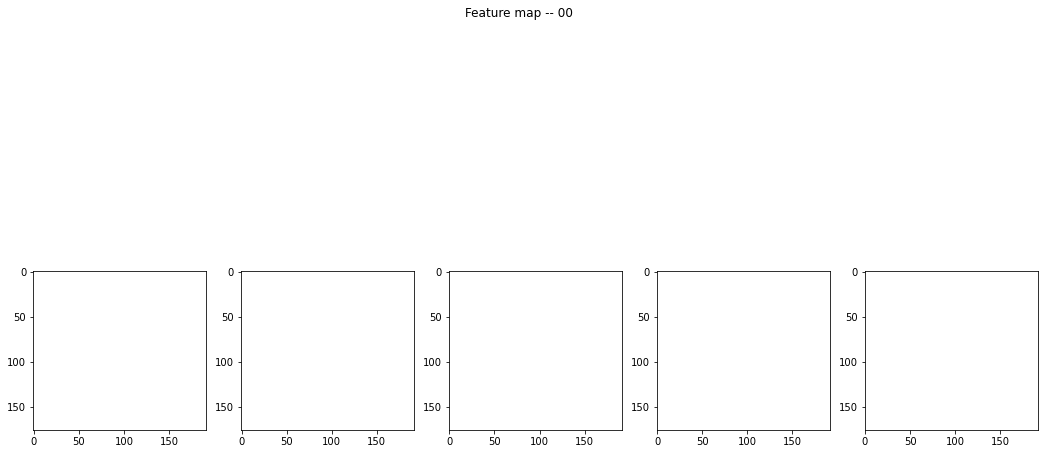

In [10]:
amap = activation_dict['final_conv']['module.method.final_conv']
amap
print(amap.shape)
##data = amap.cpu().detach().numpy()
data = amap.sigmoid().cpu().detach().numpy()
## data[data < 1-1e-1] = 0

ncols = 5
nrows = 1

for channel in range(data.shape[1]):
    fig   = plt.figure(figsize = (18,10))
    gspec = fig.add_gridspec( nrows, ncols,
                              #width_ratios  = [1/2, 1/2, 1/2, 1/2, 1/2, 1/2, 1/20],
                              #height_ratios = [1/2, 1/2], 
                            )
    ax_list = [ fig.add_subplot(gspec[j, i], aspect = 1) for i in range(ncols) for j in range(nrows)]
    for i, ax in enumerate(ax_list):
        img = data[i,channel,]
        factor = 1
        vmin = img.mean()
        vmax = vmin + factor * img.std()
        im = ax.imshow(img, vmin = vmin, vmax = vmax)
        #im = ax.imshow(img, vmin = 0, vmax = 1)
        im.set_clim(vmin, vmax)
        ## print(vmin, vmax)
        #im.set_clim(0, 1)
    fig.suptitle(f"Feature map -- {channel:02d}")

In [13]:
model_named_parameters = train_state_dict['model_named_parameters']

In [14]:
plt.figure( figsize = (20, 8) )
for i, (name, param) in enumerate(model_named_parameters):
    if grad is None: continue
    
    # Skip biases...
    if "bias" in name: continue
    
    if "batch_norm" in name: continue
    
    print('layer %02d (%-40s): mean %+e, std %e' % (i, name[name.find(".")+1:], param.mean(), param.std()))
    
    hy, hx = np.histogram(param.cpu().detach().numpy(), density = True)
    plt.plot(hx[:-1], hy, label = name)
plt.legend(bbox_to_anchor=(1.25, 1.00));
plt.title('weight distribution');

NameError: name 'grad' is not defined

<Figure size 1440x576 with 0 Axes>

In [15]:
model_named_gradients = train_state_dict['model_named_gradients']

In [16]:
plt.figure( figsize = (20, 8) )
for i, (name, grad) in enumerate(model_named_gradients):
    if grad is None: continue
    
    # Skip biases...
    if "bias" in name: continue
    
    print('layer %02d (%-40s): mean %+e, std %e' % (i, name[name.find(".")+1:], grad.mean(), grad.std()))
    
    hy, hx = np.histogram(grad.cpu().detach().numpy(), density = True)
    plt.plot(hx[:-1], hy, label = name)
plt.xlim(-1e-3, 1e-3)
plt.legend(bbox_to_anchor=(1.25, 1.00));
plt.title('weight distribution');

layer 00 (method.down_conv.0.first.weight         ): mean +nan, std nan


ValueError: autodetected range of [nan, nan] is not finite

<Figure size 1440x576 with 0 Axes>